
<h1>Welcome to the Southern Water Corp Python Case Study!</h1>
While working on the Statistics unit, I used Microsoft Excel's data analytics capabilities to analyze Southern Water Corp's Pump Data. I realized that although Excel is powerful, creating Box Plots, multiple line plots, and performing quick analyses was a bit tricky. This case study aims to revisit the Pump Data, introducing new questions that will help us see how Python can speed up our analysis and demonstrate the capabilities of Python's plotting and modeling libraries. Let's dive in and explore the efficiency and power of Python for data analysis!

<img src = 'https://www.sdcwa.org/wp-content/uploads/2020/10/Seawater-Desalination.jpg'>

To begin my analysis, I'll import several key libraries:

Matplotlib: Python's basic plotting library. I'll use the pyplot and dates function collections from matplotlib with their own aliases. I'll also include the line %matplotlib inline so that my graphs are easily included in the notebook.

Seaborn: This library will enable me to create aesthetically pleasing plots.

Pandas: This library will allow me to view and manipulate my data in a tabular format.

statsmodels.api: This library will enable me to create statistical models, which I'll need for regression analysis.

I've included the necessary libraries below to help me get started. The code also controls how big my charts will be using the syntax (X, Y), where X represents the X-axis and Y represents the Y-axis.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use("ggplot")
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

Descriptive Statistics

For my analysis, I utilized two distinct files provided by Southern Water Corp:

DF_Raw_Data: This file contains all the 'raw' Pump Data necessary for my initial analysis.
DF_Rolling_Stdev: This file specifically includes the Rolling Standard Deviation Data required for questions 10 onwards.
This deliberate separation of data ensures clarity in calculations. When performing rolling standard deviation calculations, I ensured to utilize the DF_Rolling_Stdev.csv file for accurate results and consistent analysis.


In [3]:
dataframe_raw=pd.read_csv('DF_Raw_Data.csv')
dataframe_raw.head()

,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
0,Raw,9/12/2014 0:00,41.30,41.16,98,207,54,3.86,74.84,0
1,Raw,9/12/2014 0:01,42.40,41.39,92,212,46,3.71,75.25,0
2,Raw,9/12/2014 0:02,41.43,41.15,80,207,55,3.15,74.82,0
3,Raw,9/12/2014 0:03,42.21,40.93,83,190,49,3.00,74.42,0
4,Raw,9/12/2014 0:04,40.51,43.32,90,195,50,3.34,78.76,0


In [4]:
len(dataframe_raw['Pump Efficiency'])

2453

In [5]:
dataframe_stdev=pd.read_csv('DF_Rolling_Stdev.csv')
dataframe_stdev.head()

,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
0,Rolling Stdev (30 Minute),9/12/2014 0:00,1.04,0.96,5.54,11.70,3.40,0.32,1.74,0
1,Rolling Stdev (30 Minute),9/12/2014 0:01,1.06,1.01,5.49,11.73,3.36,0.31,1.83,0
2,Rolling Stdev (30 Minute),9/12/2014 0:02,1.06,1.03,5.62,11.94,3.40,0.31,1.87,0
3,Rolling Stdev (30 Minute),9/12/2014 0:03,1.06,1.05,5.61,12.10,3.30,0.31,1.90,0
4,Rolling Stdev (30 Minute),9/12/2014 0:04,1.07,1.03,5.61,12.31,3.36,0.30,1.88,0


 Visualization: Boxplot and Lineplot
After obtaining the upper and lower quartiles for each row of data using the .describe command, I gained insights into the distribution of entries in each dataset (~2,452 entries).

Transitioning from table statistics to visualizations in Python, I proceeded with the following steps for both the dataframe_raw and dataframe_stdev datasets:

Boxplot Visualization:
i) Utilized the dataframe to create a boxplot, providing a clear visual representation of the data's distribution.

Lineplot Visualization:
ii) Created a lineplot using the dataframe to visualize trends and patterns within the data.

These visualizations not only enhance the interpretability of the data but also provide deeper insights compared to viewing purely numerical summaries.




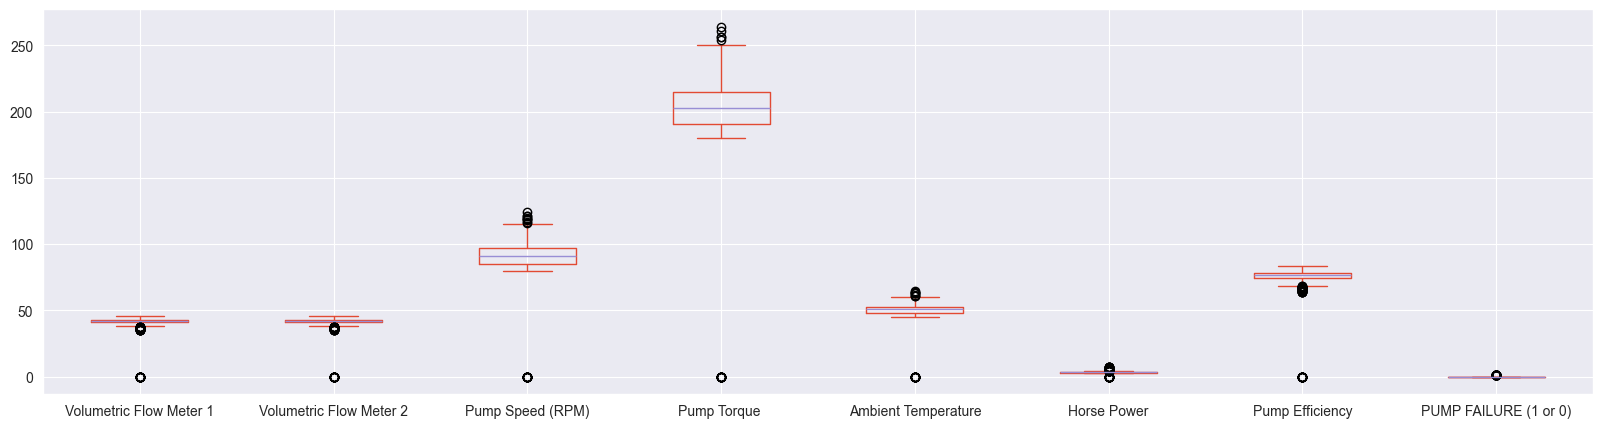

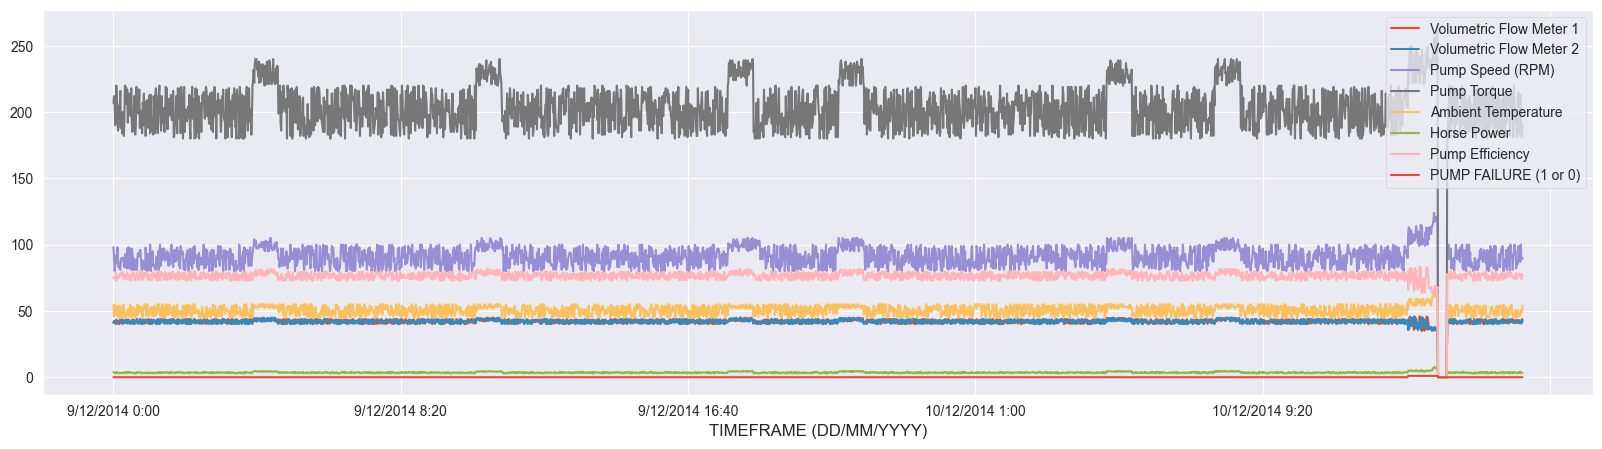

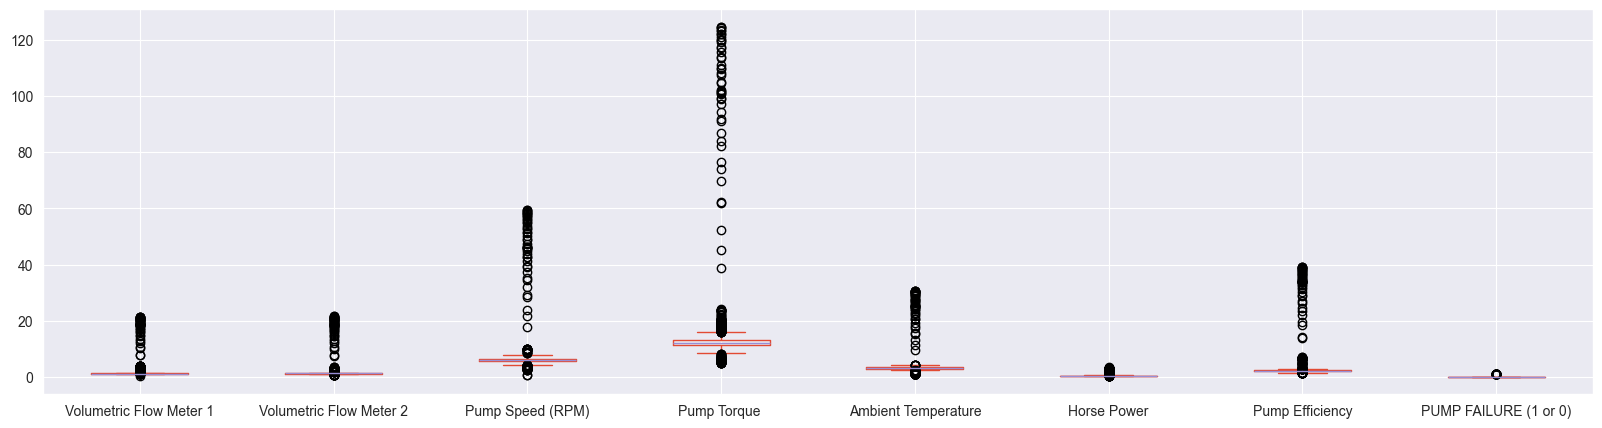

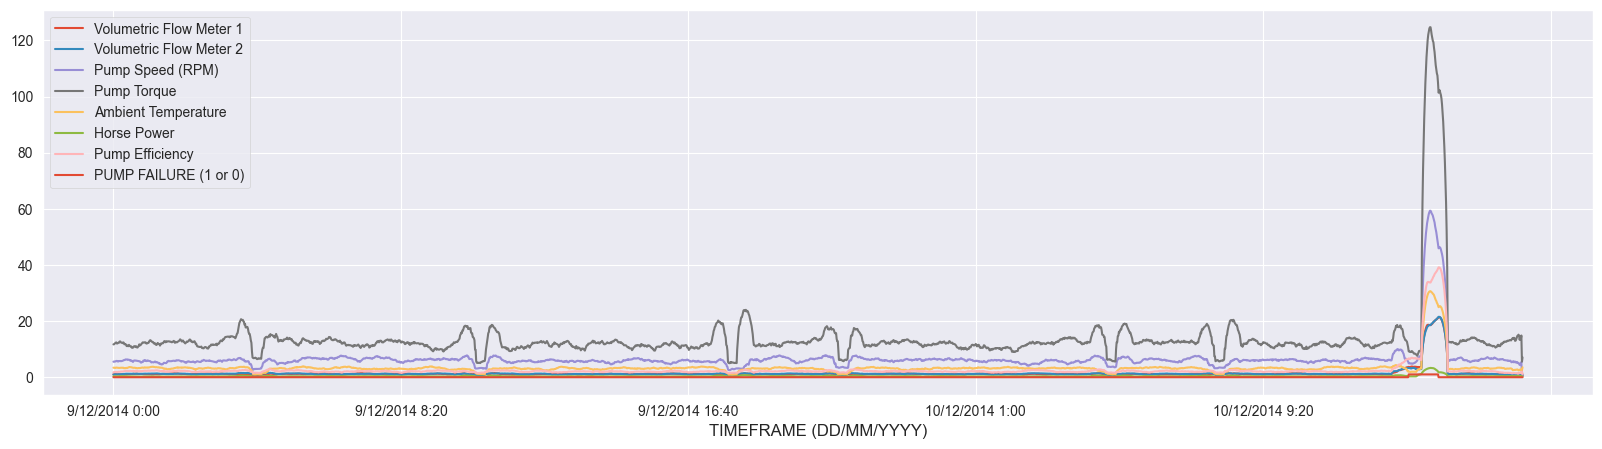

In [6]:
#i) Using the DataFrame, create a boxplot visualising this data.
dataframe_raw.plot(kind='box')
plt.show()
dataframe_raw.plot(x='TIMEFRAME (DD/MM/YYYY)')
plt.show()
#####
dataframe_stdev.plot(kind='box')
plt.show()
dataframe_stdev.plot(x='TIMEFRAME (DD/MM/YYYY)')
plt.show()

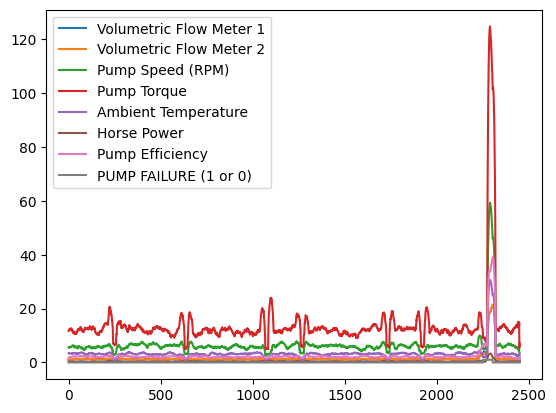

In [46]:
dataframe_stdev.plot(kind='line')
plt.show()

In this step, I focused on analyzing the datasets based on the Pump Failure variable, which indicates whether the Pump is failing (1) or operating normally (0).

To visualize the differences between these populations, I separated the datasets using boolean filters and created boxplots for both the dataframe_raw and dataframe_stdev datasets:

Using dataframe_raw Dataset:
i) Created two boxplots:

One for when the Pump Failure is 1 (Pump is failing).
Another for when the Pump Failure is 0 (Pump is in normal operations).
These visualizations help highlight any distinct trends or variations in the data based on the operational status of the Pump.

Remember to provide clear titles for each boxplot to distinguish between failure and normal operation conditions. This approach leverages boolean filtering to effectively subset the data for analysis.

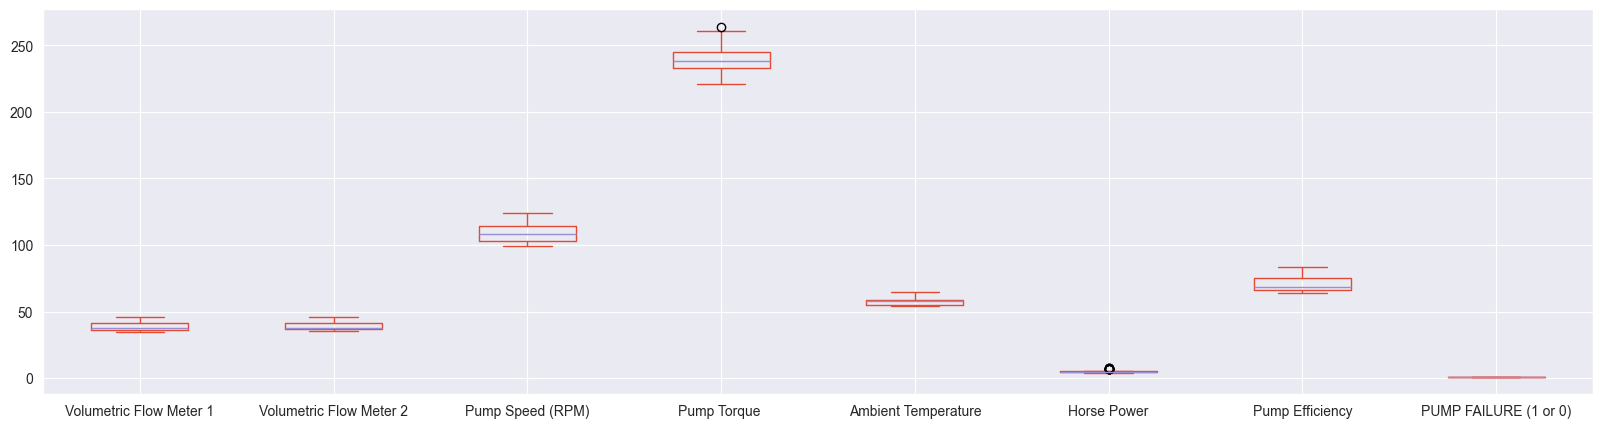

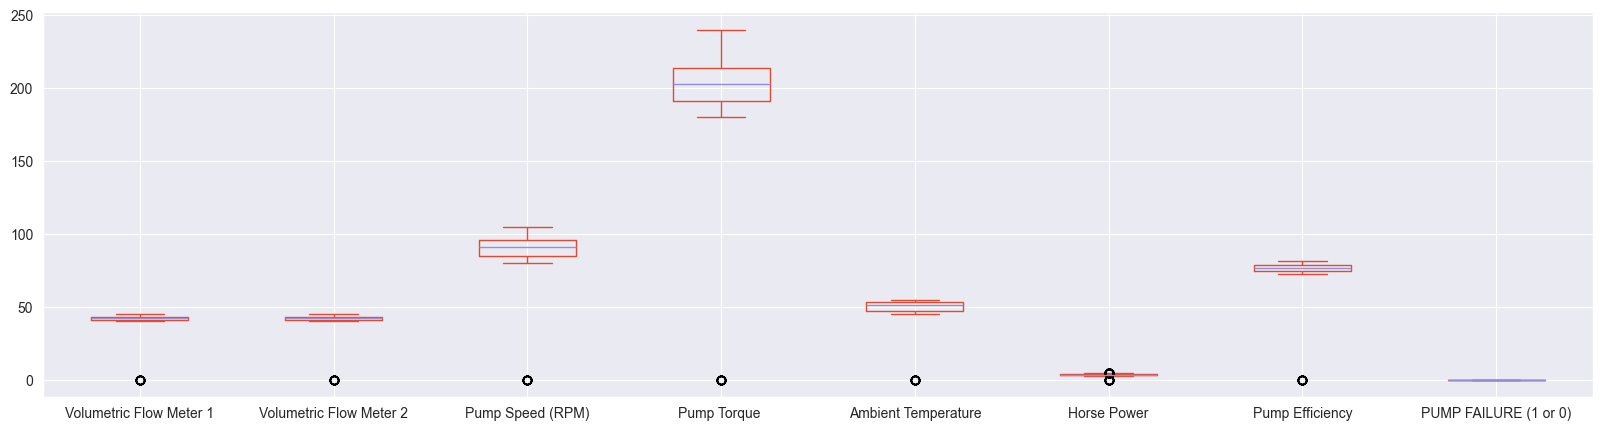

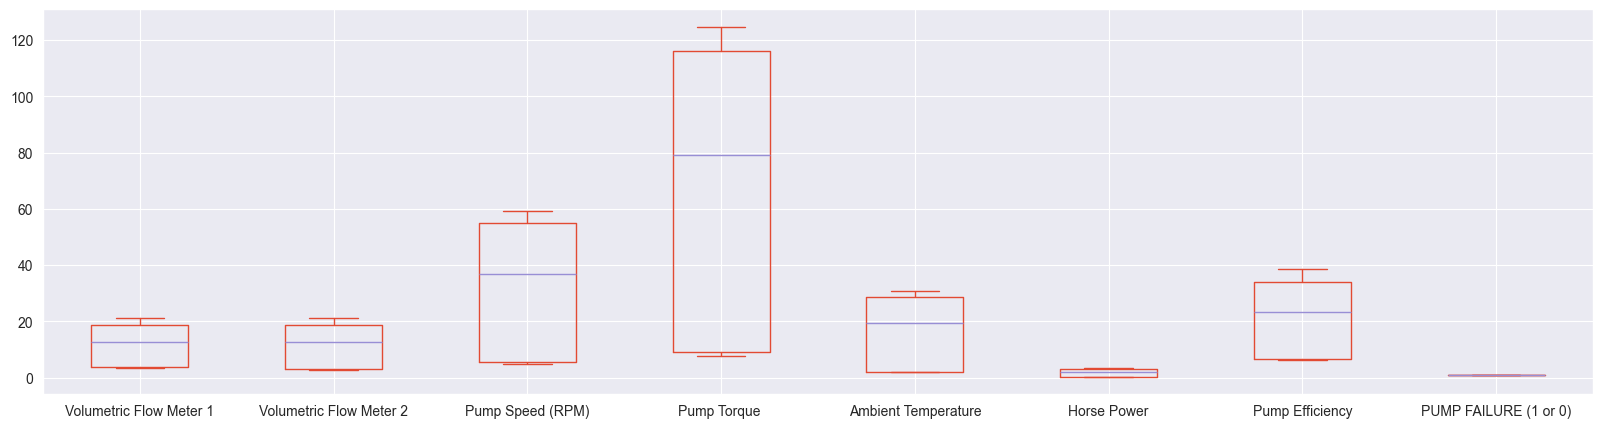

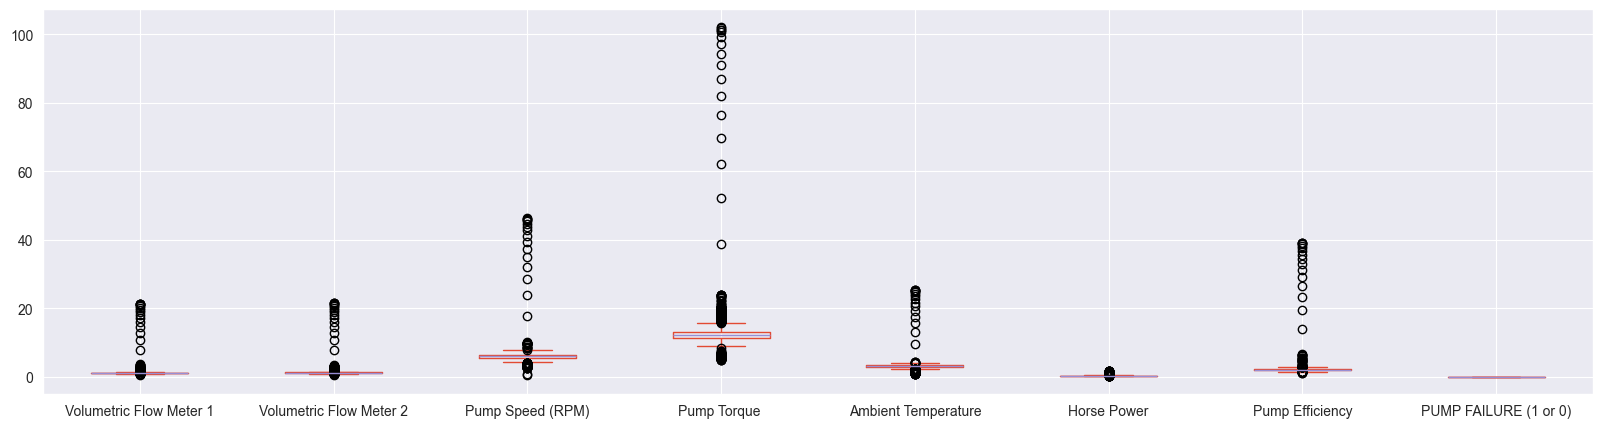

In [9]:
#i) Using the dataframe_raw dataset, create two boxplots specifically for when the pump has failed and when the pump is working normally.
condition_1 = dataframe_raw['PUMP FAILURE (1 or 0)']== 1
dataframe_raw_Failure = dataframe_raw[condition_1] 
dataframe_raw_Failure.plot(kind='box')
plt.show()
condition_2 = dataframe_raw['PUMP FAILURE (1 or 0)']== 0
dataframe_raw_Normal = dataframe_raw[condition_2] 
dataframe_raw_Normal.plot(kind='box')
plt.show()
#ii)Using the dataframe_stdev dataset, create two boxplots specifically for when the pump has failed and when the pump is working normally.
condition_3 = dataframe_stdev['PUMP FAILURE (1 or 0)']== 1
dataframe_stdev_Failure = dataframe_stdev[condition_3] 
dataframe_stdev_Failure.plot(kind='box')
plt.show()
condition_4 = dataframe_stdev['PUMP FAILURE (1 or 0)']== 0
dataframe_stdev_Normal = dataframe_stdev[condition_4] 
dataframe_stdev_Normal.plot(kind='box')
plt.show()


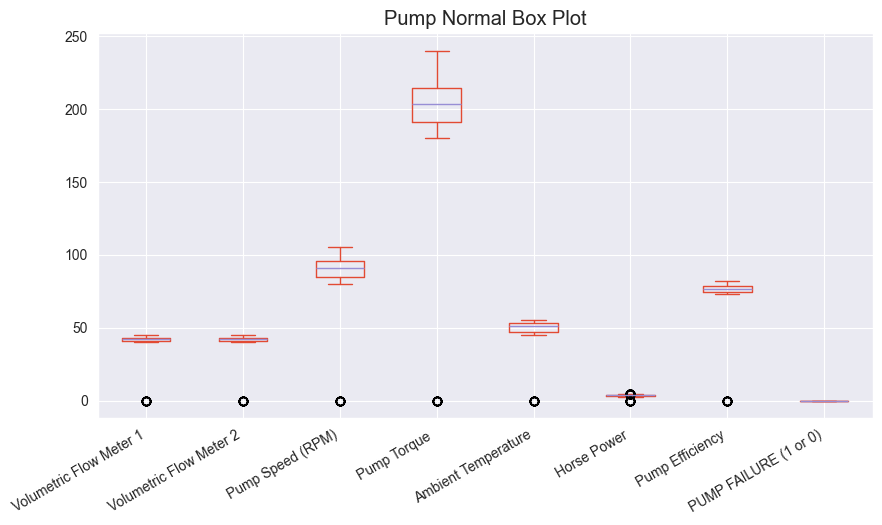

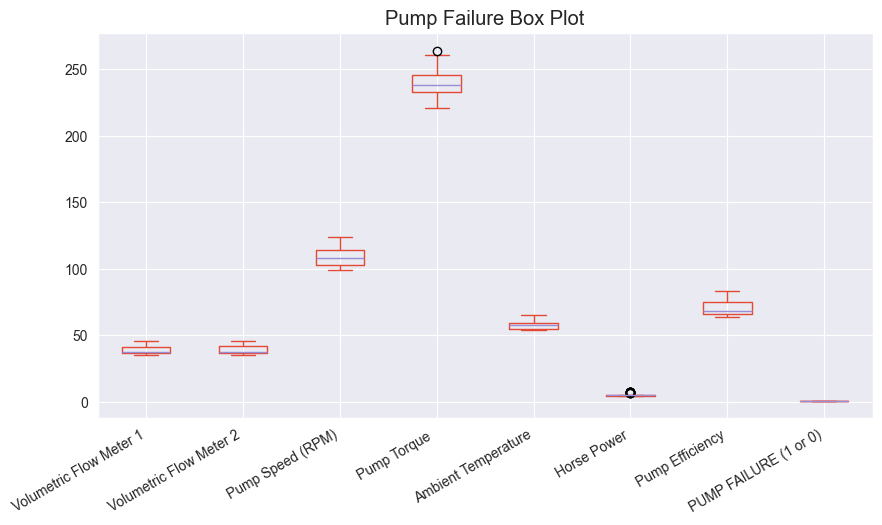

In [8]:
dataframe_raw.head()

condition1 = dataframe_raw['PUMP FAILURE (1 or 0)'] == 0
pump_success = dataframe_raw[condition1]

fig, ax = plt.subplots(figsize=(10, 5))
pump_success.plot(kind='box', ax=ax)
plt.title('Pump Normal Box Plot')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

condition2 = dataframe_raw['PUMP FAILURE (1 or 0)'] == 1
pump_failure = dataframe_raw[condition2]

fig, ax = plt.subplots(figsize=(10, 5))
pump_failure.plot(kind='box', ax=ax)
plt.title('Pump Failure Box Plot')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()


Now, let's experiment with removing outliers from our dataset using the following steps:

Define the Quartiles Q1 (25th percentile) and Q3 (75th percentile).

Calculate the Interquartile Range (IQR), which is Q3 - Q1.

Create two new variables:

Lower_Range: Q1 - 1.5 * IQR
Upper_Range: Q3 + 1.5 * IQR
Utilize boolean subsetting to filter the DataFrame for outliers and remove them based on the calculated ranges.

Calculate the proportion of entries remaining after outlier removal compared to the total number of entries in the dataset.

Following these steps ensures that we identify and address outliers effectively, minimizing their potential to skew our analysis. This approach helps maintain data integrity and reliability in our findings.

Create Quartiles

To proceed with creating quartiles using the dataframe_raw dataset, I followed these steps:

i) I used the .quantile() function to calculate two new variables:

Q1: Contains the 25th percentile for all columns in the dataframe.
Q3: Contains the 75th percentile for all columns in the dataframe.
Referencing the .quantile() function's documentation helped clarify the process.

ii) After defining Q1 and Q3, I calculated the Interquartile Range (IQR) for all columns in the dataframe using the formula:

IQR = Q3 - Q1
This step provided me with insights into the spread and variability of the data across different columns.

This approach allowed me to understand the distribution of data within the dataset more comprehensively, essential for further analysis and decision-making processes.

In [11]:
Q1=dataframe_raw.quantile(0.25, axis=0, numeric_only=True, interpolation='linear')
Q3=dataframe_raw.quantile(0.75, axis=0, numeric_only=True, interpolation='linear')
IQR=(Q3-Q1)
IQR
IQR.head()

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
dtype: float64

Identify Outliers


Let's calculate how we can identify and remove outliers from our dataset.

We know the general formula for outliers:
<b> Outlier = Q1 - 1.5 * IQR OR Q3 + 1.5 * IQR </b>

Let's break down the steps to identify these outliers:

i) First, define two new variables:

Lower_Limit: Calculated as Q1 - 1.5 * IQR
Upper_Limit: Calculated as Q3 + 1.5 * IQR
These limits will help us identify outliers in the data.

ii) Using the Lower_Limit and Upper_Limit with an OR (|) condition, filter the dataframe_raw to include only the outliers. Count how many outliers are identified.

The syntax should look like this:
<b>Outliers = dataframe_raw[((dataframe_raw < Lower_Limit) | (dataframe_raw > Upper_Limit)).any(axis=1)]</b>

The .any(axis=1) ensures that any row containing values that fall outside the defined limits across any column will be identified as an outlier.

iii) Calculate the percentage of data that remains after removing the outliers from the dataframe_raw dataset.

This step helps gauge the impact of outlier removal on the dataset's overall size and integrity, ensuring a more robust analysis.

In [12]:
Lower_limit=Q1-(1.5*IQR)
Upper_limit=Q3+(1.5*IQR)
#Using Lower_Limit and Upper_Limit with an OR (|) condition, filter the dataframe to include only the Outliers. How many Outliers do we have
Outliers=dataframe_raw[((dataframe_raw[IQR.index]<Lower_limit)| ((dataframe_raw[IQR.index]> Upper_limit))).any(axis=1)]
Outliers

,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
248,Raw,9/12/2014 4:08,44.61,42.28,103,240,54,4.71,81.11,0
267,Raw,9/12/2014 4:27,43.02,44.53,102,238,53,4.62,78.22,0
272,Raw,9/12/2014 4:32,43.37,42.30,104,238,52,4.71,78.85,0
641,Raw,9/12/2014 10:41,42.50,43.12,105,234,52,4.68,77.27,0
655,Raw,9/12/2014 10:55,42.90,43.26,104,236,53,4.67,78.00,0
...,...,...,...,...,...,...,...,...,...,...
2316,Raw,10/12/2014 14:36,0.00,0.00,0,0,0,0.00,0.00,0
2317,Raw,10/12/2014 14:37,0.00,0.00,0,0,0,0.00,0.00,0
2318,Raw,10/12/2014 14:38,0.00,0.00,0,0,0,0.00,0.00,0
2319,Raw,10/12/2014 14:39,0.00,0.00,0,0,0,0.00,0.00,0


Create a Boxplot without Outliers


In the previous exercise, we calculated and identified outliers using boolean filtering. Now, we'll remove all outliers from our dataset using the ~ symbol and visualize the box plots without outliers.

i) Create a new dataframe called no_outliers and use the ~ operator to remove all outliers from the dataframe_raw.

ii) Using the no_outliers dataframe:

Create a boxplot for when PUMP FAILURE is 1 (Failure).
Create a boxplot for when PUMP FAILURE is 0 (Normal Behavior).
This step ensures that our visualizations accurately represent the data distribution without the influence of outliers, providing clearer insights into pump behavior under normal and failure conditions.

<Figure size 1000x500 with 0 Axes>

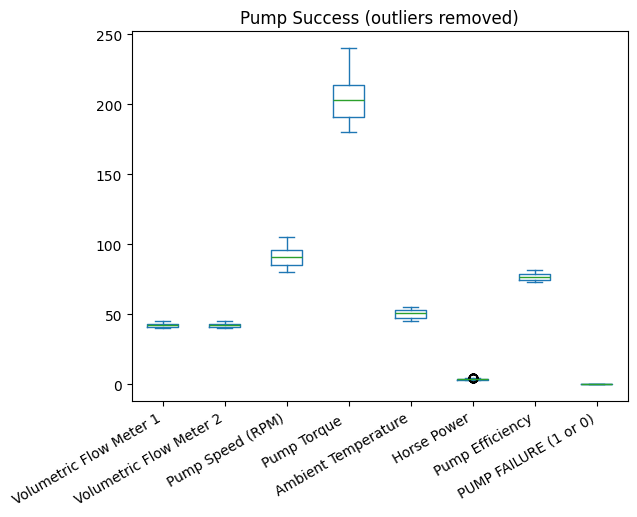

<Figure size 1000x500 with 0 Axes>

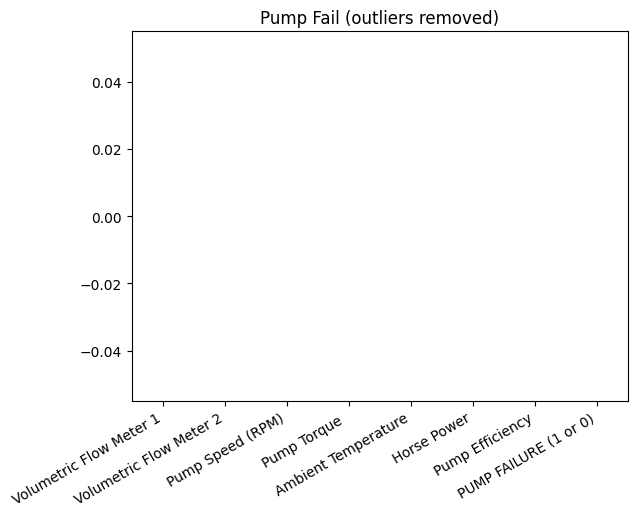

In [23]:
no_outliers=dataframe_raw[~((dataframe_raw[IQR.index]<Lower_limit)| ((dataframe_raw[IQR.index]> Upper_limit))).any(axis=1)]
no_outliers

condition1 = no_outliers['PUMP FAILURE (1 or 0)'] == 0
pump_success_no = no_outliers[condition1]
plt.figure(figsize=(10, 5))
ax = pump_success_no.plot(kind='box')
plt.title('Pump Success (outliers removed)')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

condition2 = no_outliers['PUMP FAILURE (1 or 0)'] == 1
pump_fail_no = no_outliers[condition2]
plt.figure(figsize=(10, 5))
ax = pump_fail_no.plot(kind='box')
plt.title('Pump Fail (outliers removed)')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()



Exploring Variables Against Pump Failure


To enrich my analysis and gain deeper insights into the factors influencing pump failure, I iterated through each numerical variable in the dataframe_raw dataset. This process involved plotting each variable individually against the Pump Failure indicator (0 or 1).

I defined a list named ListOfVariables containing all the numerical column names from the dataframe_raw dataset.

Using a for loop, I sequentially plotted each variable against Pump Failure:

Each plot featured dual axes to clearly visualize the relationship between the variable (on the first Y-axis) and Pump Failure (on the second Y-axis).
This methodological approach facilitated a detailed examination of how each variable correlates with pump failure, allowing me to discern significant trends and patterns in the dataset.

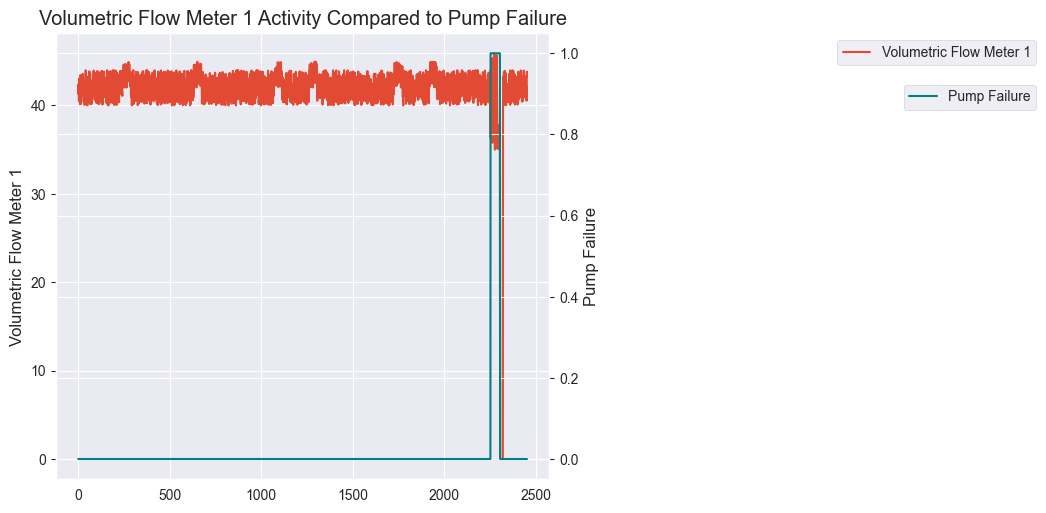

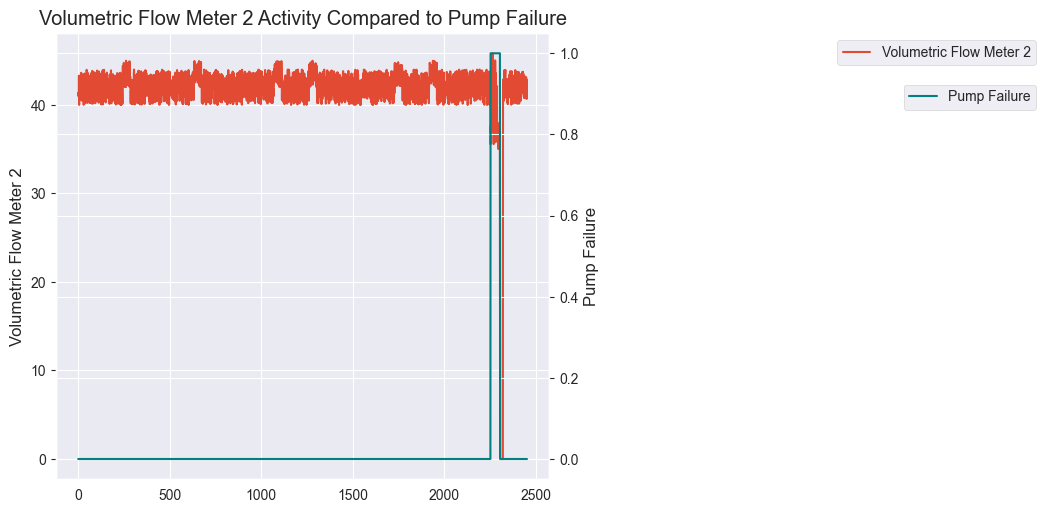

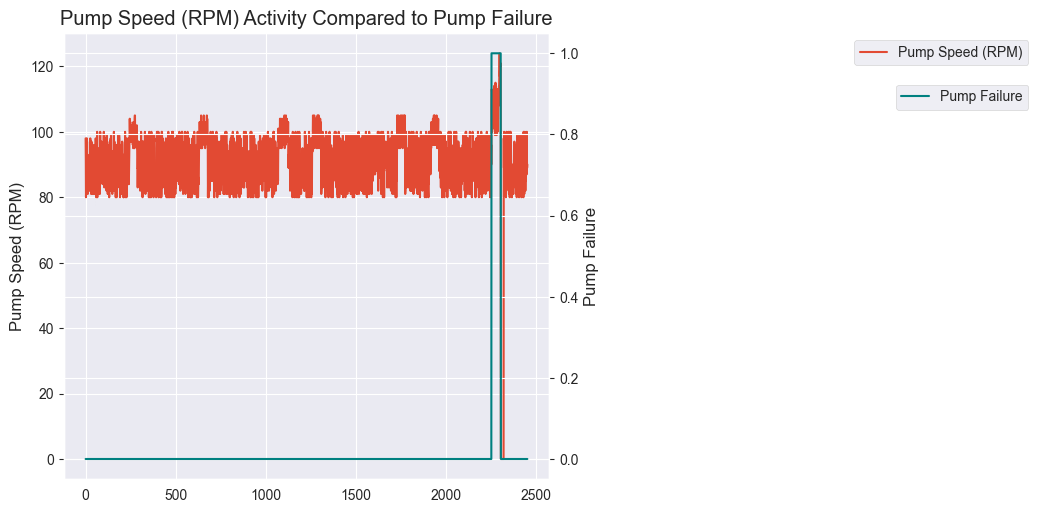

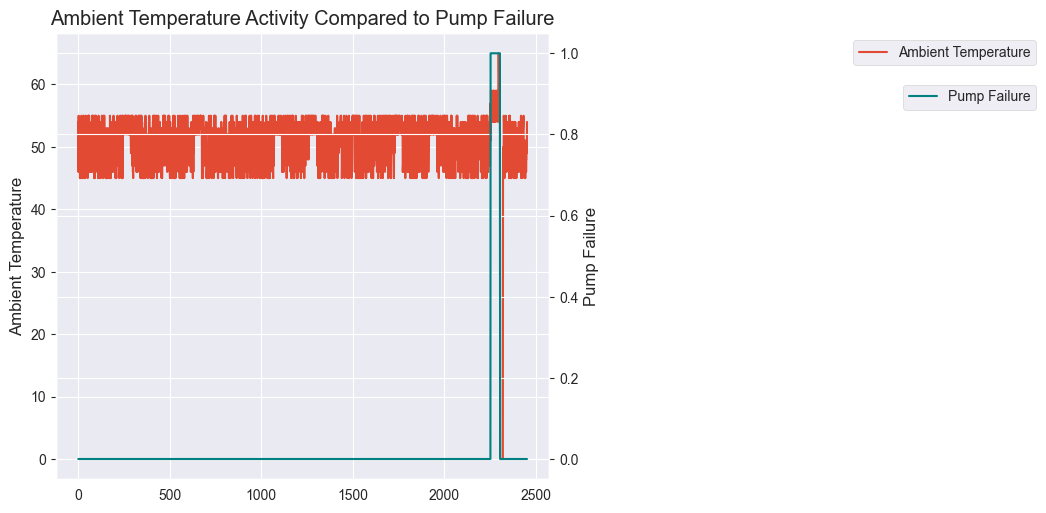

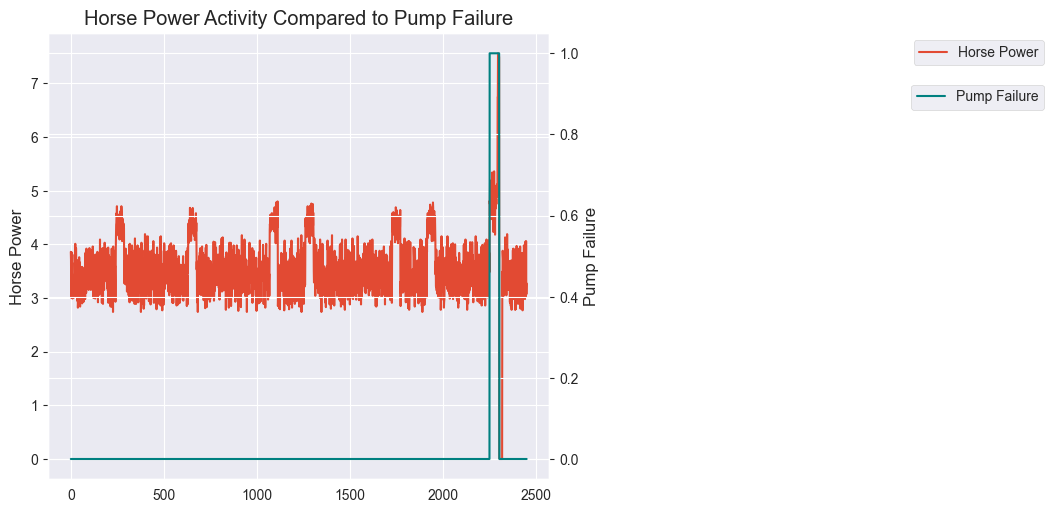

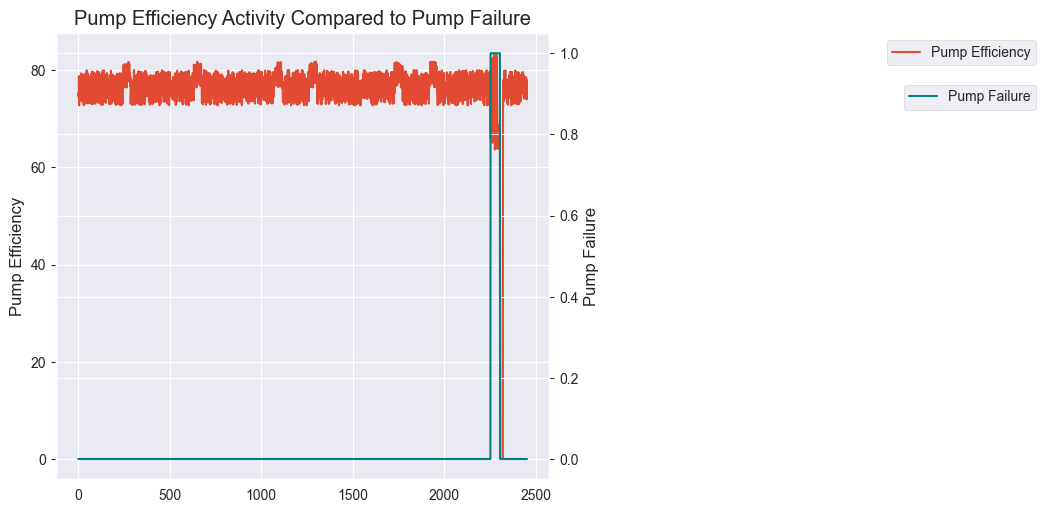

In [13]:
columns1 = ['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency']
columns2 = ['PUMP FAILURE (1 or 0)']
ListOfVariables = dataframe_raw[columns1].columns
mpl.rcParams['figure.figsize'] = (25,5)
for i in ListOfVariables:
    failurestate = dataframe_raw[columns2]
    ax = dataframe_raw[i].plot()
    ax.set_ylabel(i)
    ax2 = ax.twinx()
    ax2.plot(failurestate, color='teal', label='Pump Failure')
    ax2.set_ylabel("Pump Failure")
    
    ax.legend(bbox_to_anchor=(2, 1))
    ax2.legend(bbox_to_anchor=(2, 0.9))
    
    minTime =  dataframe_raw.index.min()
    maxTime = dataframe_raw.max()
    plt.tight_layout()
    plt.title(i + " Activity Compared to Pump Failure")

    plt.show()



Analyzing Dataframe_stdev Over Time


To delve deeper into the insights provided by the dataframe_stdev dataset, I undertook a similar iterative process as with dataframe_raw. Here’s how I approached it:

Now that I've iterated through the dataframe_raw, I proceeded with a similar exercise focusing on the dataframe_stdev dataset. The objective was to leverage Python's powerful inferential statistics and plotting libraries to zoom in on specific periods of interest for further examination.

Setting Index for Timeframe:

I began by setting the index of the dataframe_stdev dataset to the TIMEFRAME (DD/MM/YYYY) attribute. This indexing is crucial for filtering and analyzing data over specific time periods.
Creating Plots for Pump Failures Over Time:

Using the ListOfVariables created earlier, I re-plotted all numerical variables in dataframe_stdev for the time period from 10/12/2014 12:00 to 10/12/2014 14:30.
Each plot was configured with dual axes, where the numerical variable was on the primary Y-axis, and the Pump Failure variable was on the secondary Y-axis. This setup facilitated observation of how variables correlated with Pump Failure over time.
This approach not only enhanced the granularity of analysis but also provided deeper insights into the dynamics of pump behavior during specific time intervals, aiding in informed decision-making processes.

In [100]:
dataframe_stdev.columns

Index(['Data Source', 'Volumetric Flow Meter 1', 'Volumetric Flow Meter 2',
       'Pump Speed (RPM)', 'Pump Torque ', 'Ambient Temperature',
       'Horse Power', 'Pump Efficiency', 'PUMP FAILURE (1 or 0)'],
      dtype='object')

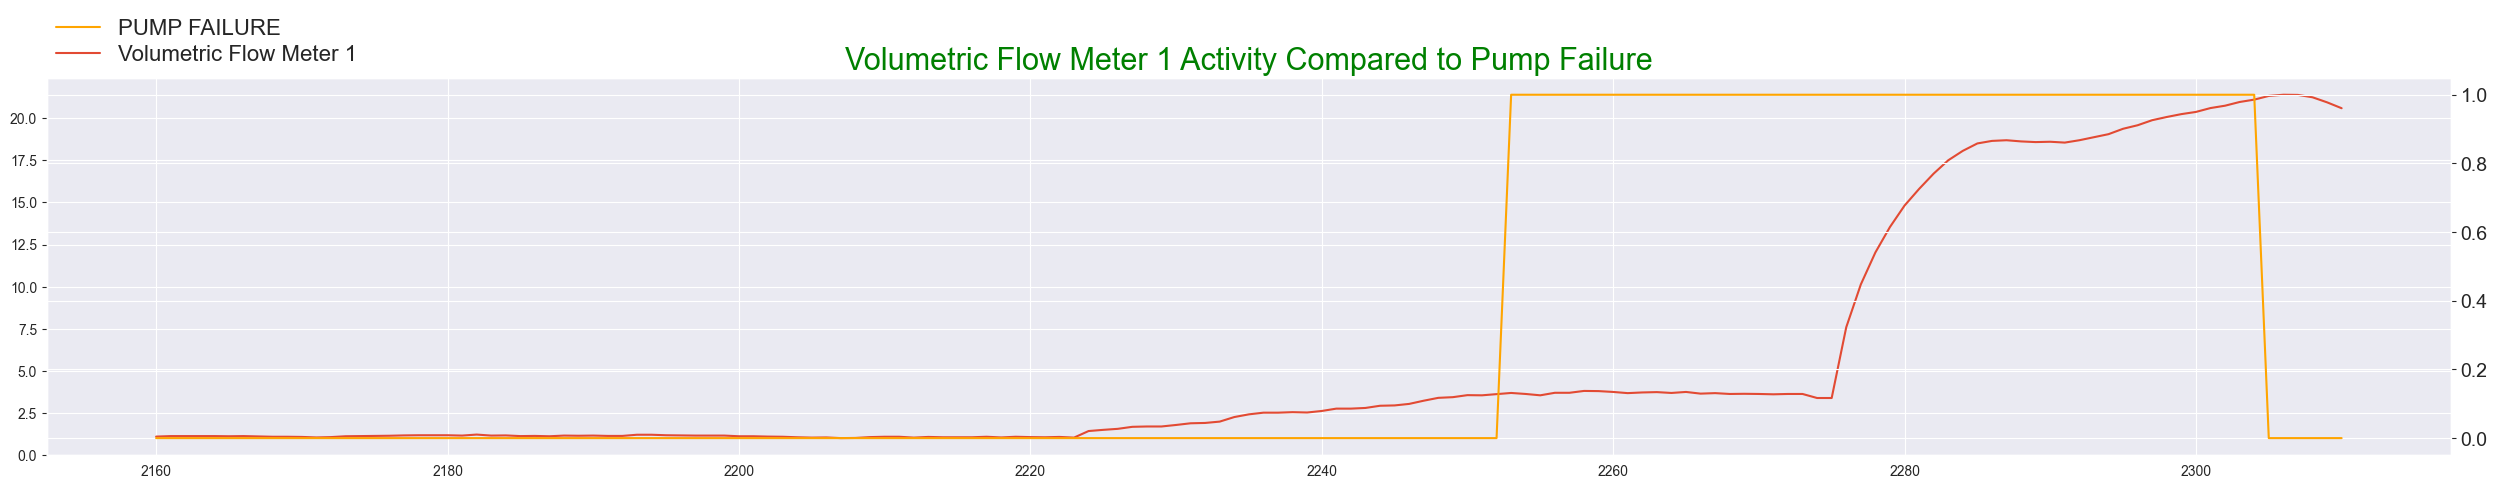

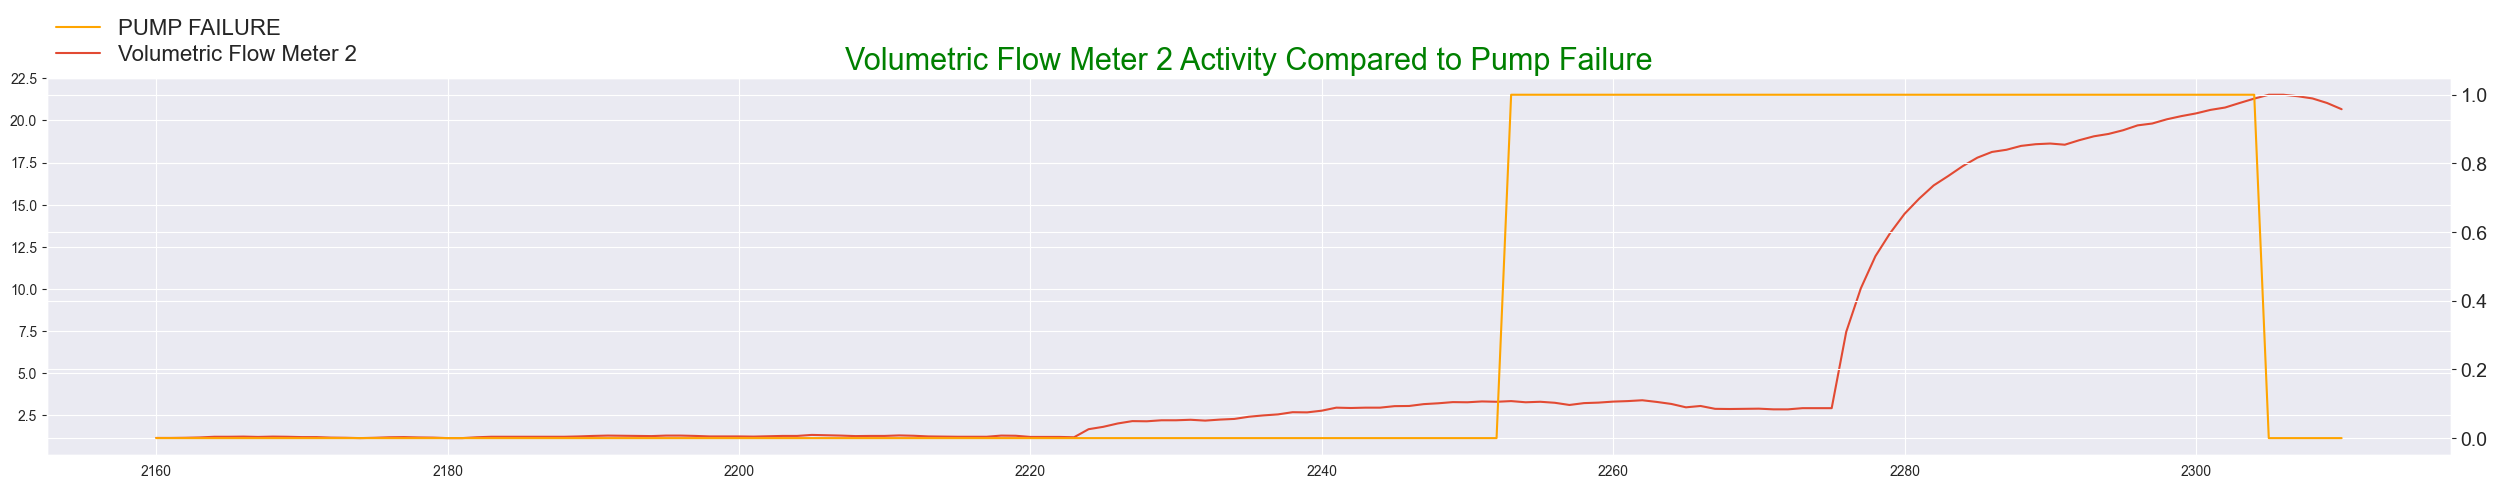

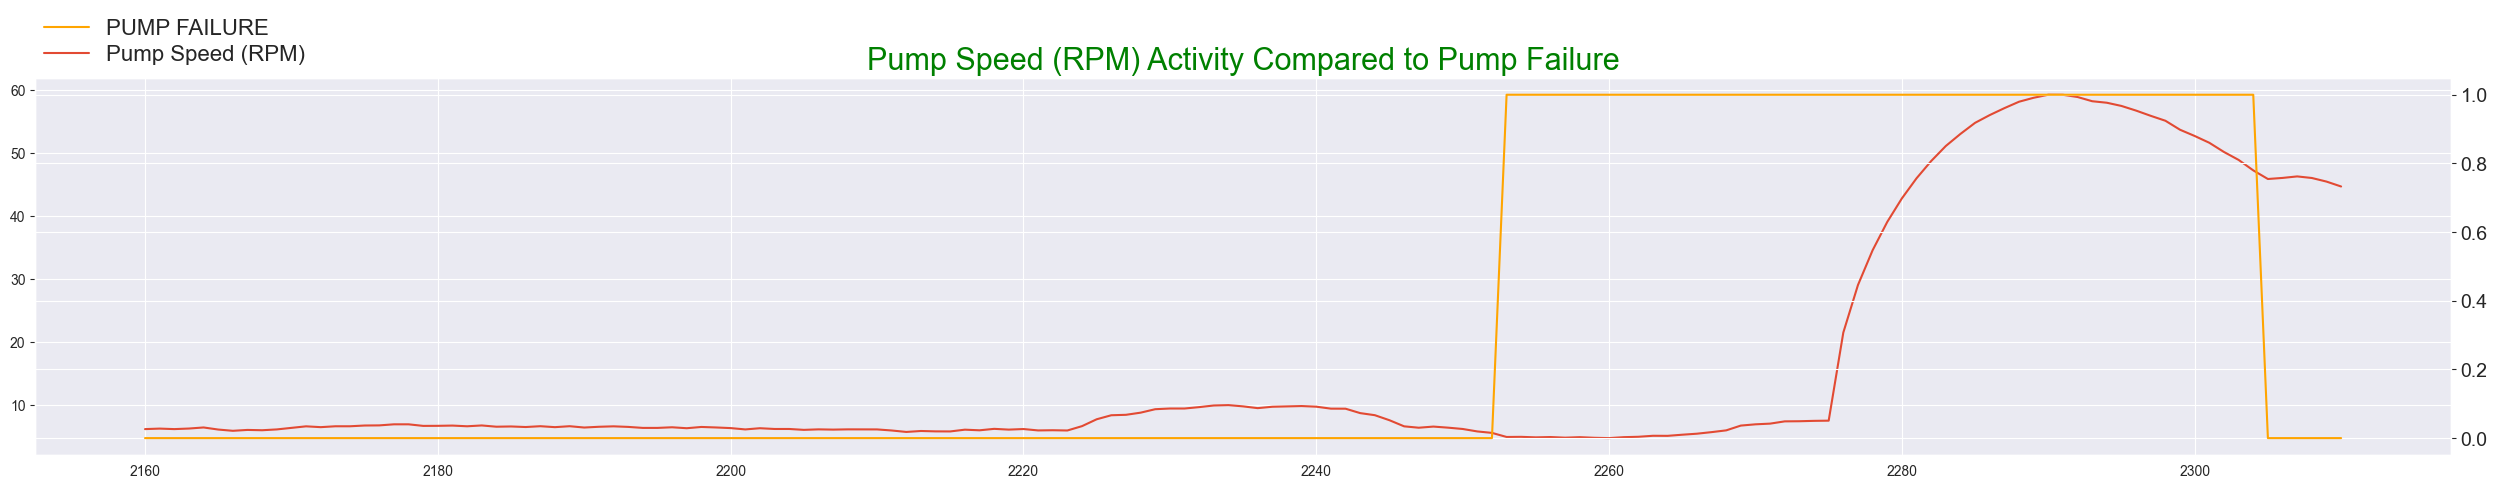

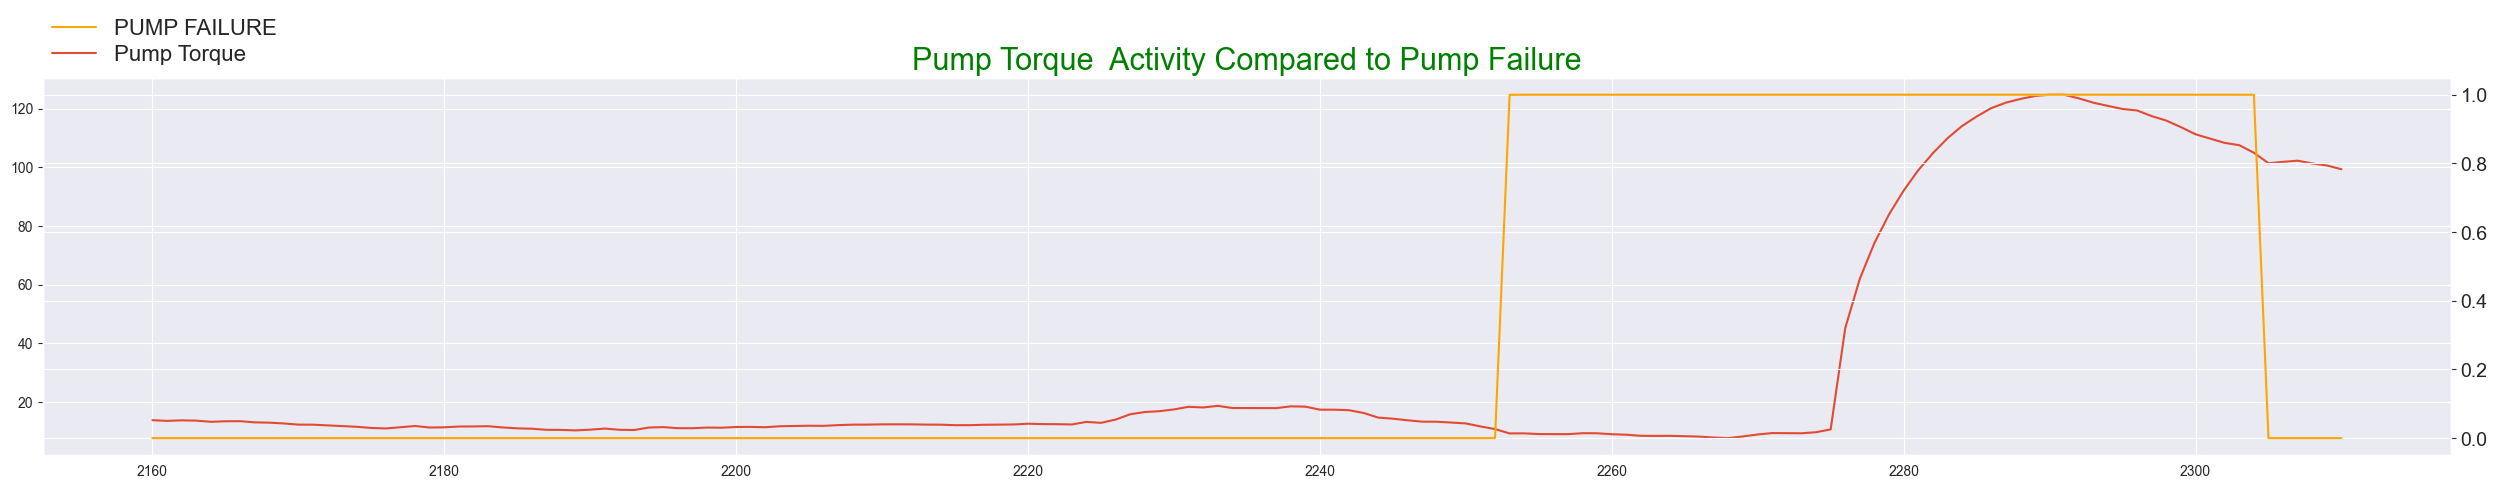

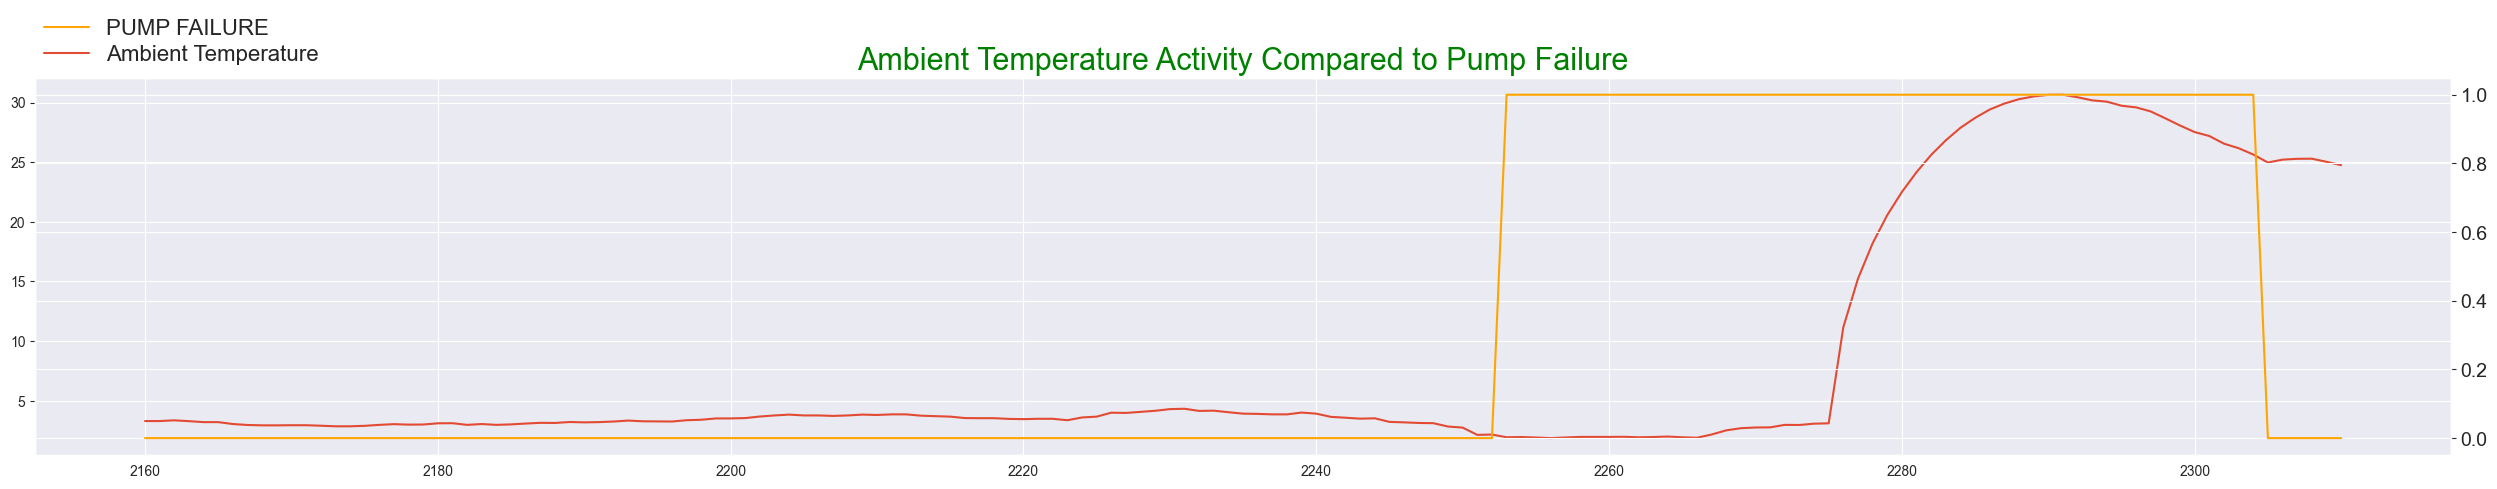

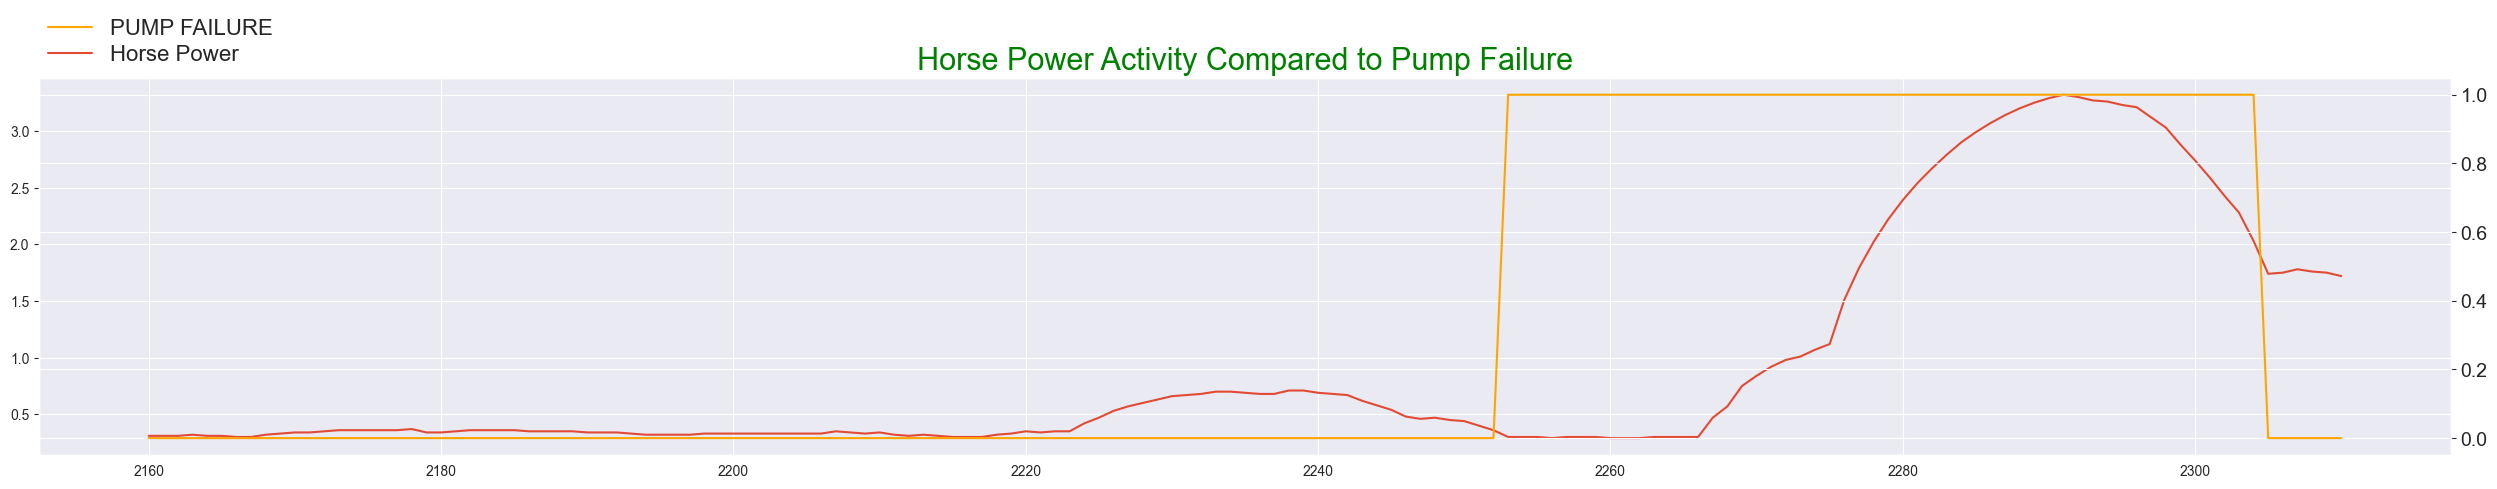

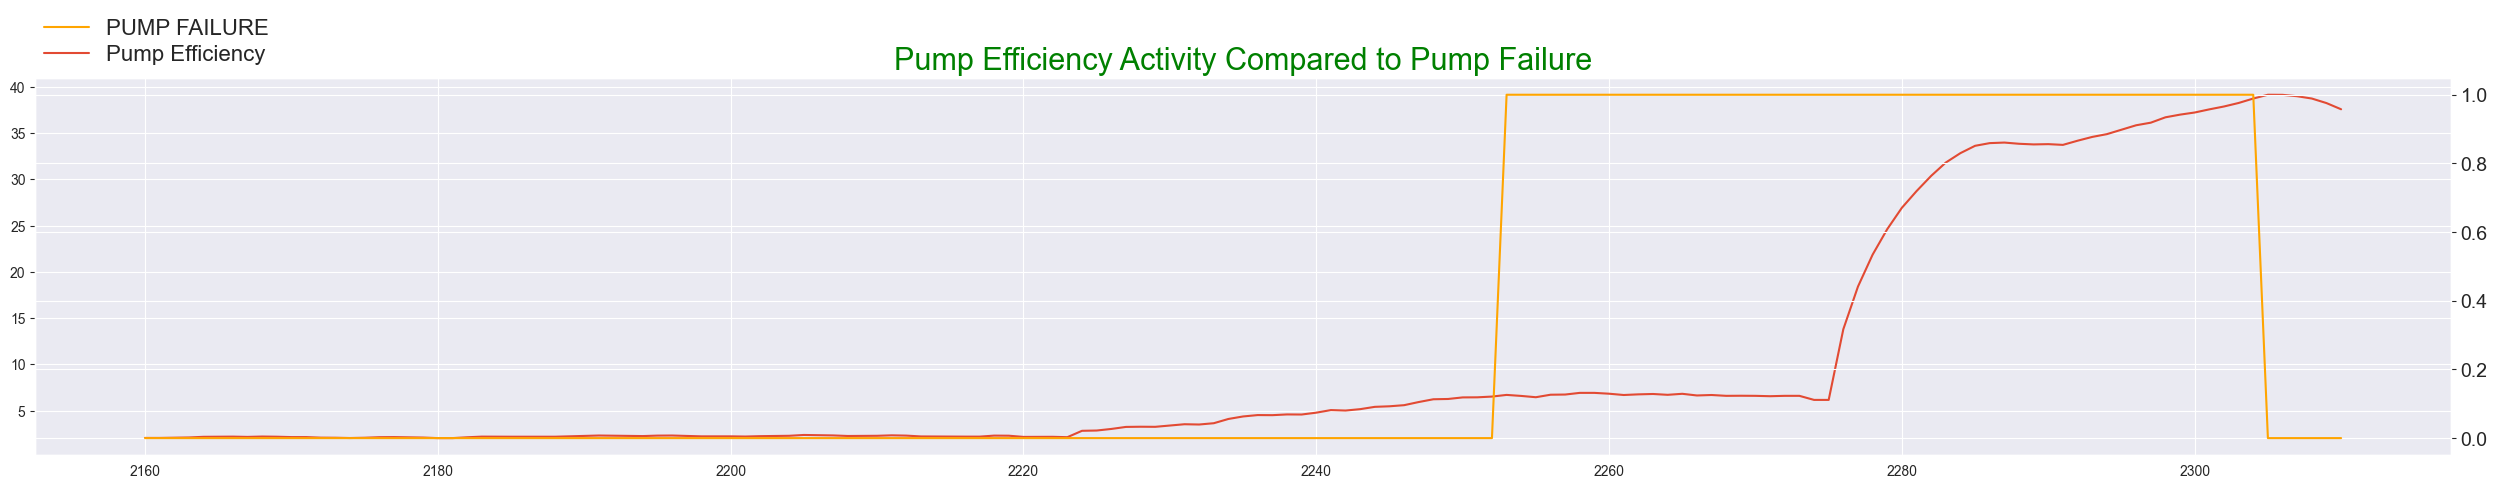

In [14]:
dataframe_stdev.head()
from datetime import datetime
#dataframe_stdev.reset_index(inplace=True)
dataframe_stdev.set_index('TIMEFRAME (DD/MM/YYYY)')
#dataframe_time_filtered = dataframe_stdev[(dataframe_stdev.index >= "10/12/2014 12:00") & (dataframe_stdev.index <= "10/12/2014 14:30")]
dataframe_time_filtered = dataframe_stdev[(dataframe_stdev['TIMEFRAME (DD/MM/YYYY)'] >= "10/12/2014 12:00")&\
                               (dataframe_stdev['TIMEFRAME (DD/MM/YYYY)'] <= "10/12/2014 14:30")]
dataframe_time_filtered.head()

columns1 = ['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)','Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency']
columns2 = ['PUMP FAILURE (1 or 0)']
failurestate = dataframe_time_filtered[columns2]
ListOfVariables = dataframe_time_filtered[columns1].columns

for i in ListOfVariables:
    ax1 = dataframe_time_filtered[i].plot()
    ax2 = ax1.twinx()
    ax2.plot(failurestate, 'orange', label = 'PUMP FAILURE')
    ax1.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
            borderaxespad=0, frameon=False, fontsize=16)
    ax2.legend(loc='lower left', bbox_to_anchor= (0.0, 1.08), ncol=2,
            borderaxespad=0, frameon=False, fontsize=16)
    minTime = dataframe_time_filtered.index.min()
    maxTime = dataframe_time_filtered.index.max()
    plt.tight_layout()
    plt.title(i + " Activity Compared to Pump Failure",fontsize = 22, color='green')
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()  
    


Creating a Heatmap

When I performed inferential statistics for Southern Water Corp using Excel, I utilized the data analysis package to generate a heatmap using the correlation function. This heatmap visually represented the attributes strongly correlated with Pump Failure.

Now, leveraging Python's capabilities with Matplotlib and Seaborn, I'll replicate this analysis by creating a heatmap using Seaborn's heatmap function.

i) Using Seaborn's heatmap function:

I applied Pandas' .corr() function to compute correlations for all variables in the dataframe_raw dataset.
Then, I passed the correlated dataframe to sns.heatmap() to visualize these correlations.
This approach allows for a clear visualization of how each variable relates to Pump Failure, helping to identify significant correlations and insights within the dataset.

(8.5, -0.5)

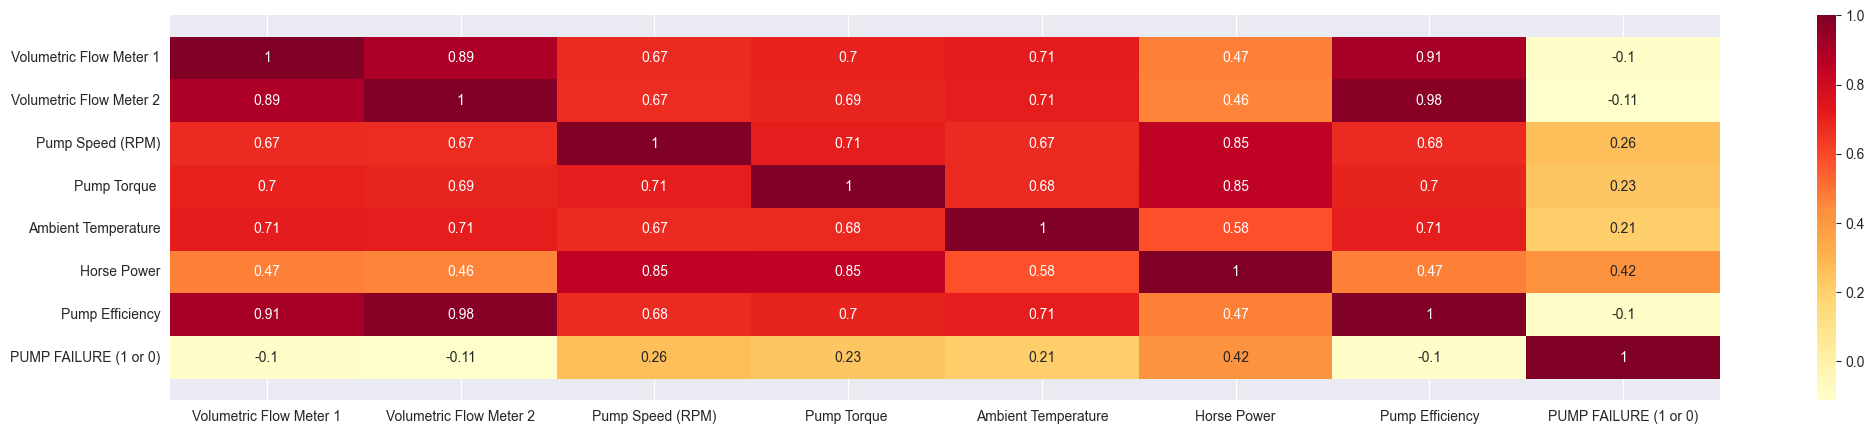

In [15]:
columns = ['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)','Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency'
           ,'PUMP FAILURE (1 or 0)']
corr_df = dataframe_raw[columns].corr()
df_heatmap = sns.heatmap(corr_df, cmap='YlOrRd', annot=True)
bottom, top = df_heatmap.get_ylim()
df_heatmap.set_ylim(bottom + 0.5, top - 0.5)

**Which variables seem to correlate with Pump Failure?**


In [103]:
!pip install --upgrade matplotlib
!pip install --upgrade seaborn

In [16]:
columns = ['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)','Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency'
           ,'PUMP FAILURE (1 or 0)']
corr_df = dataframe_raw[columns].corr()
print(corr_df)

                         Volumetric Flow Meter 1  Volumetric Flow Meter 2  \
Volumetric Flow Meter 1                 1.000000                 0.893058   
Volumetric Flow Meter 2                 0.893058                 1.000000   
Pump Speed (RPM)                        0.674691                 0.671896   
Pump Torque                             0.700425                 0.692183   
Ambient Temperature                     0.713913                 0.710423   
Horse Power                             0.470081                 0.462087   
Pump Efficiency                         0.913014                 0.980144   
PUMP FAILURE (1 or 0)                  -0.102508                -0.112115   

                         Pump Speed (RPM)  Pump Torque   Ambient Temperature  \
Volumetric Flow Meter 1          0.674691      0.700425             0.713913   
Volumetric Flow Meter 2          0.671896      0.692183             0.710423   
Pump Speed (RPM)                 1.000000      0.711037           

Creating a Barplot of Correlated Features

To visualize the correlation between features and Pump Failure (1 or 0) in descending order, I utilized the correlated dataframe previously created.

i) Using the correlated dataframe:

I employed the .corr() function on the dataframe to compute the correlation values.
Next, I created a barplot that displays the correlated features against Pump Failure.
The barplot was organized in descending order to highlight the most strongly correlated features first.
This approach provides a clear graphical representation of how each feature correlates with Pump Failure, aiding in the identification of influential factors within the dataset.

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

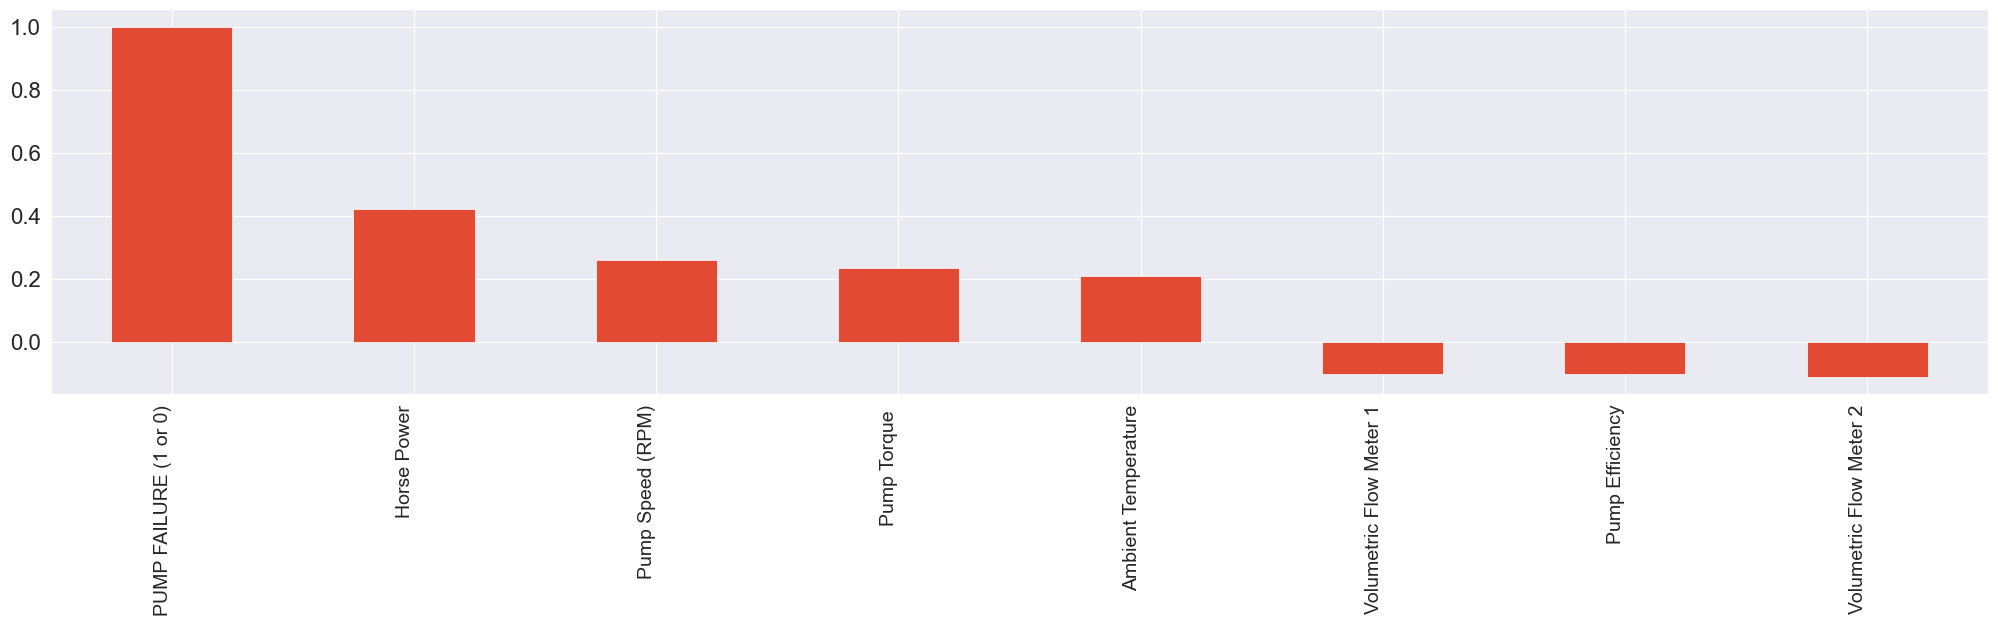

In [17]:
colList_corr = corr_df.columns
corrdf=corr_df.sort_values('PUMP FAILURE (1 or 0)', ascending=False)
corrdf['PUMP FAILURE (1 or 0)'].plot(kind='bar')
plt.xticks(rotation=90, horizontalalignment='right', fontsize=14)
plt.yticks(fontsize = 16)

Creating a Rolling Standard Deviation Heatmap


Previously, I created a correlation matrix using 'raw' variables, which provided some insights but didn't reveal exceptionally strong correlations. Now, I'll enhance our analysis by creating a heatmap using the dataframe_stdev dataset imported in Step Two.

i) Using Seaborn's heatmap function:

I applied Pandas' .corr() function on the dataframe_stdev dataset to compute correlations, including R, for all variables.
Then, I used sns.heatmap() to visualize these correlations in the form of a heatmap.
This heatmap will provide a clearer view of how variables are correlated in the dataframe_stdev dataset, particularly focusing on rolling standard deviations, which can reveal different insights compared to the 'raw' data correlations.

(8.5, -0.5)

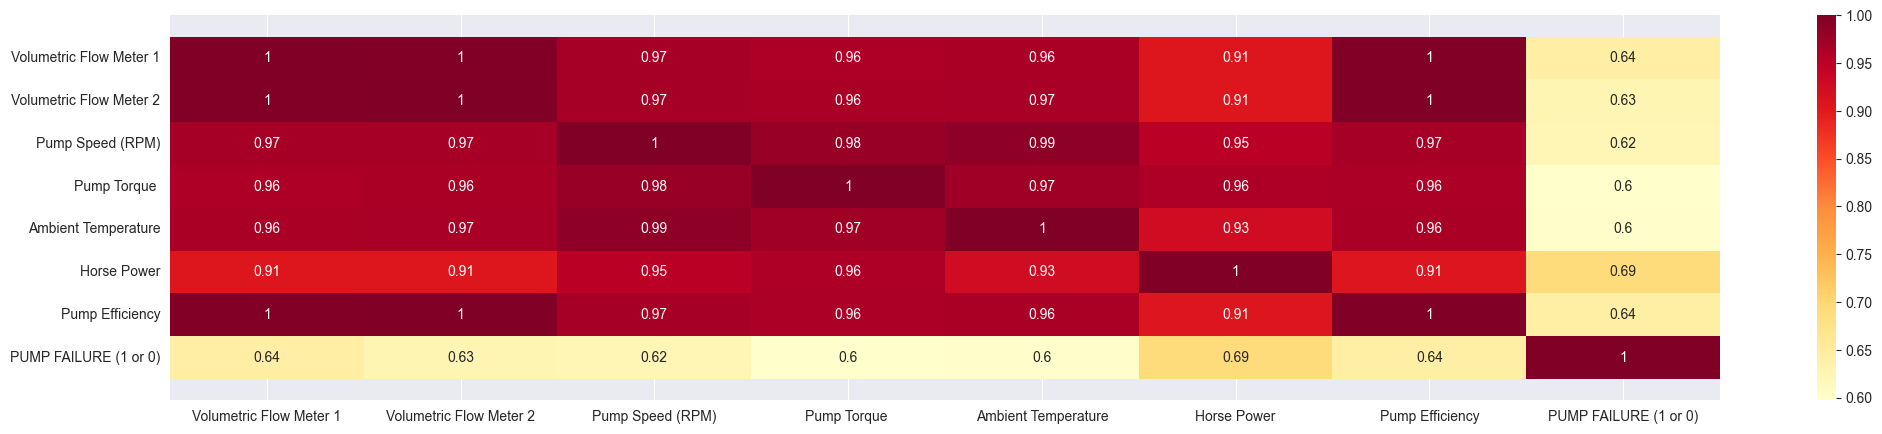

In [18]:
corrdf_stdv = dataframe_stdev[columns].corr()
corrdf_stdv_heatmap = sns.heatmap(corrdf_stdv, cmap='YlOrRd', annot=True)
bottom, top = corrdf_stdv_heatmap.get_ylim()
corrdf_stdv_heatmap.set_ylim(bottom + 0.5, top - 0.5)

### Creating a Multivariate Regression Model


When working on this case study in Excel, I went through the process of using rolling standard deviation variables to generate a regression equation, which is simpler in Python.
I used the statsmodel.api library and called the Ordinary Least Squares (OLS) Regression to create a multivariate regression model with more than one independent variable.
I established two dataframes: independent_variables (explanatory variables) and dependent_variables (Pump Failure) and added a constant to account for bias.
I stored and fit the model using sm.OLS(dependent_variable, independent_variable).fit(), then printed regression_model.summary() to view the regression statistics, and repeated these steps with the dataframe_stdev dataset.

In [19]:
#Dataframe_Raw
columns1 = ['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)','Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency']
columns2 = ['PUMP FAILURE (1 or 0)']
dependent_variables = dataframe_raw[columns2]
independent_variables = dataframe_raw[columns1]
independent_variables = sm.add_constant(independent_variables)
regression_model = sm.OLS(dependent_variables,independent_variables).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Tue, 25 Jun 2024   Prob (F-statistic):          5.58e-233
Time:                           11:13:45   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1138      0.028      4.058      0.000       0.059       0.169
Volumetric Flow Meter 1    -0.0145      0.002     -7.974      0.000      -0.018      -0.011
Volumetric Flow Meter 2    -0.0184      0.003     -5.497      0.000      -0.025      -0.012
Pump Speed (RPM)            0.0021      0.001      2.589      0.010       0.001       0.004
Pump Torque                 0.0007      0.000      1.801      0.072   -6.24e-05       0.001
Ambient Temperature         0.0099      0.001     14.159      0.000       0.009       0.011
Horse Power                 0.0827      0.019      4.373      0.000       0.046       0.120
Pump Efficiency             0.0020      0.002      1.028      0.304      -0.002       0.006
==============================================================================
Omnibus:                     2071.669   Durbin-Watson:                   0.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58977.621
Skew:                           3.929   Prob(JB):                         0.00
Kurtosis:                      25.700   Cond. No.                     3.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#Dataframe_Stdev
columns1 = ['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)','Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency']
columns2 = ['PUMP FAILURE (1 or 0)']
dependent_variables = dataframe_stdev[columns2]
independent_variables = dataframe_stdev[columns1]
independent_variables = sm.add_constant(independent_variables)
regression_model2 = sm.OLS(dependent_variables,independent_variables).fit()
regression_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                           11:14:00   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0354      0.004    -10.045      0.000      -0.042      -0.029
Volumetric Flow Meter 1     0.0513      0.010      5.109      0.000       0.032       0.071
Volumetric Flow Meter 2    -0.6085      0.020    -30.450      0.000      -0.648      -0.569
Pump Speed (RPM)           -0.0178      0.002     -9.057      0.000      -0.022      -0.014
Pump Torque                -0.0189      0.001    -22.511      0.000      -0.020      -0.017
Ambient Temperature         0.0178      0.003      5.773      0.000       0.012       0.024
Horse Power                 0.7636      0.022     35.045      0.000       0.721       0.806
Pump Efficiency             0.3407      0.012     28.118      0.000       0.317       0.364
==============================================================================
Omnibus:                     1432.369   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72092.923
Skew:                           2.052   Prob(JB):                         0.00
Kurtosis:                      29.245   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I've identified that one of my regressive models has a better fit than the previous model.
Using this model, I extracted the coefficients to understand the variables that display the largest absolute rate of change with respect to Pump Failure.
I assessed which variables spike the most in relation to Pump Failure using the extracted coefficients.
I created a bar plot to identify which coefficients react most strongly with respect to Pump Failure, determining the three variables with the strongest relationship to Pump Failure.



<Axes: xlabel='varname'>

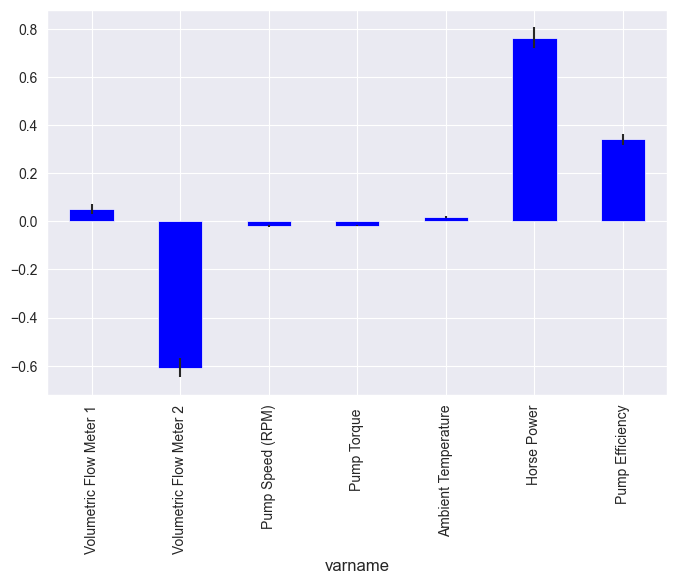

In [21]:
#Dataframe_Stdev
columns1 = ['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)','Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency']
columns2 = ['PUMP FAILURE (1 or 0)']
dependent_variables = dataframe_stdev[columns2]
independent_variables = dataframe_stdev[columns1]
independent_variables = sm.add_constant(independent_variables)
regression_model2 = sm.OLS(dependent_variables,independent_variables).fit()
regression_model2.summary()
##############################
regression_model2.params
#regression_model2=pd.DataFrame(regression_model2)
#regression_model2.head()
regression_model2.conf_int()
err_series = regression_model2.params - regression_model2.conf_int()[0]
err_series
coef_df = pd.DataFrame({'coef': regression_model2.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
coef_df
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='blue', 
             yerr='err', legend=False)

To validate predictions, I created a new column in the dataframe_stdev called 'Prediction' using the regression equation and applied the .predict() function to the independent variables in the dataframe_stdev dataset.
I used the syntax regressive_model.predict(independent_variables) to generate a column of regressive predictions, with extra information found on the statsmodels website.
I created a dual-axis plot with Axes One containing Volumetric Flow Meter 2, Pump Efficiency, and Horse Power, and Axes Two containing Pump Failure (1 or 0) and Prediction.
I utilized the .twinx() function to assist in creating the dual-axis plot, ensuring both axes were clearly represented.

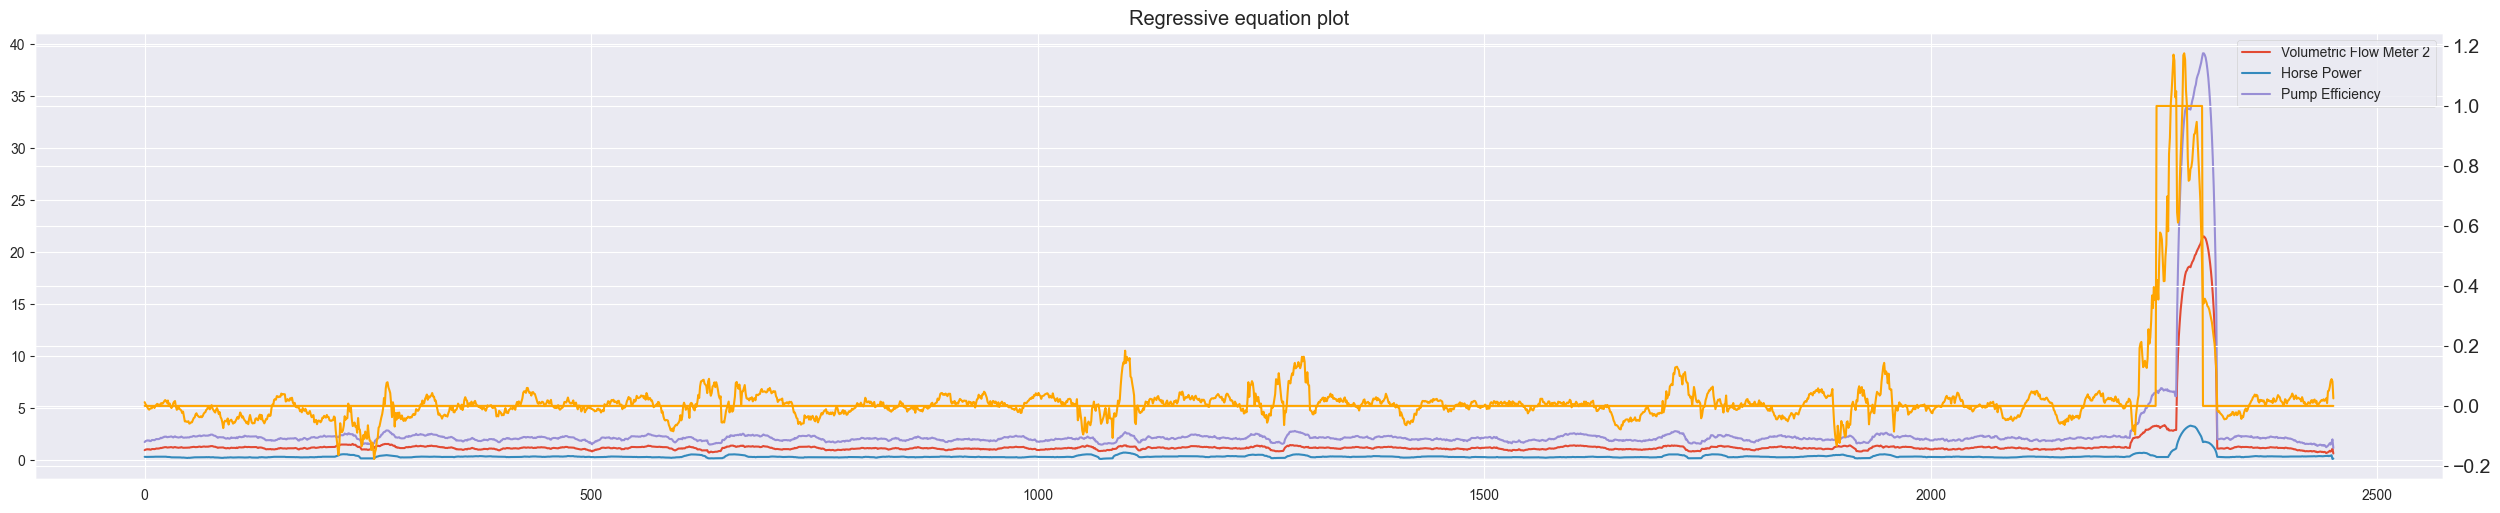

In [22]:
dataframe_stdev['Prediction']=regression_model2.predict(independent_variables)
dataframe_stdev
#dataframe_stdev.reset_index(inplace=True)
Axes1 = ['Volumetric Flow Meter 2','Horse Power', 'Pump Efficiency']
Axes2 = ['PUMP FAILURE (1 or 0)','Prediction']
ax1 = dataframe_stdev[Axes1].plot()
ax2 = ax1.twinx()
ax2.plot(dataframe_stdev[Axes2], 'orange', label = 'PUMP FAILURE')
plt.tight_layout()
plt.title('Regressive equation plot')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()  

Throughout the Southern Water Corp case study, I've achieved significant milestones in data analysis and visualization, which have been instrumental in understanding and interpreting the company's operational data:

Visualizing Trends: I used line plots and box plots to visually explore trends and distributions within Southern Water Corp's pump data, providing insights into operational patterns and anomalies.

Statistical Insights: Leveraging descriptive statistics from .describe(), I extracted key metrics that helped in assessing pump performance and operational efficiency over time.

Data Integrity: Detecting and removing outliers ensured the reliability of my analysis, enabling more accurate insights into pump behavior and performance.

Focused Analysis: By mastering subset and filter operations on dataframes, I zoomed in on specific time periods or operational conditions critical to understanding pump failures and maintenance needs.

Efficiency in Analysis: Using for loops efficiently processed and analyzed large volumes of data, uncovering patterns and correlations that informed strategic decisions within Southern Water Corp.

Advanced Visualization: Implementing dual axes plotting enhanced the clarity of my visualizations, particularly in illustrating relationships between various operational variables and pump failure incidents.

Correlation and Heatmaps: Interpreting correlation coefficients and creating heatmaps provided a comprehensive view of how different operational factors correlated with pump failures, guiding targeted improvements in maintenance strategies.

Predictive Insights: Developing and evaluating linear regression models allowed for predictive insights into future pump performance, facilitating proactive maintenance planning and operational optimization at Southern Water Corp.

These skills and methodologies collectively contributed to a deeper understanding of Southern Water Corp's operational challenges and opportunities, supporting data-driven decisions aimed at improving efficiency, reliability, and sustainability across their infrastructure.





